In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

nps_df = pd.read_csv("Clean Data\MonthlyVisits_2000-2022.csv")
nps_df['Date'] = pd.to_datetime(nps_df['Date'])

covid_df = pd.read_csv("Clean Data\Weekly_United_States_COVID-19_Cases_and_Deaths_by_State_-_ARCHIVED.csv")
covid_df['date_updated'] = pd.to_datetime(covid_df['date_updated'])
covid_df['start_date'] = pd.to_datetime(covid_df['start_date'])
covid_df['end_date'] = pd.to_datetime(covid_df['end_date'])

In [70]:
nps_df.head(3)

,ParkName,UnitCode,ParkType,Region,State,Date,Year,Month,RecreationVisits
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000-01-01,2000,1,5722
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000-02-01,2000,2,7108
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000-03-01,2000,3,12726


In [71]:
#find what states are in each region
state_region = nps_df[['State', 'Region']]#.groupby(['State']).value_counts()
state_region = state_region.drop_duplicates()
state_region


,State,Region
0,KY,Southeast
276,ME,Northeast
552,MA,Northeast
828,NY,Northeast
984,NE,Midwest
...,...,...
82054,NH,Northeast
83914,PR,Southeast
95302,GU,Pacific West
96106,CT,Northeast


In [72]:
#create a region column in the COVID dataframe 
merged_df = covid_df.merge(state_region, left_on='state', right_on = 'State')
merged_df.tail()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths,State,Region
10375,2023-04-13,WY,2023-04-06,2023-04-12,186284,158,2023,3,0,0,WY,Intermountain
10376,2023-04-20,WY,2023-04-13,2023-04-19,186399,115,2027,4,0,0,WY,Intermountain
10377,2023-04-27,WY,2023-04-20,2023-04-26,186539,140,2030,3,0,0,WY,Intermountain
10378,2023-05-04,WY,2023-04-27,2023-05-03,186668,129,2031,1,0,0,WY,Intermountain
10379,2023-05-11,WY,2023-05-04,2023-05-10,187034,366,2031,0,0,0,WY,Intermountain


In [73]:
#summarize visitors per region for each month
nps_df_filter = nps_df.query('Year > 2019')
regional_visits = pd.pivot_table(nps_df_filter, values=['RecreationVisits'], columns=['Year'], 
                                 index=['Region'], aggfunc = np.sum)
#normalize table
norm_reg_visits=(regional_visits-regional_visits.mean())/regional_visits.std()

#sumamrize covid cases per region for each week (or month?)
merged_df_filter = merged_df.query('end_date < 2023')
regional_cases = pd.pivot_table(merged_df_filter, values=['new_cases'], 
                                columns=merged_df.end_date.dt.year, index=['Region'], 
                                aggfunc = np.sum)
#normalize table
norm_reg_cases=(regional_cases-regional_cases.mean())/regional_cases.std()

#merge pivot tables together based on region
merged_regional = norm_reg_visits.merge(norm_reg_cases, left_on='Region', right_on = 'Region')
merged_regional

RecreationVisits                     new_cases            \
Year                          2020      2021      2022      2020      2021   
Region                                                                       
Alaska                   -1.719983 -1.783896 -1.816944 -1.503342 -1.524749   
Intermountain             0.443710  0.574316  0.235159  0.268620  0.154680   
Midwest                  -0.703982 -0.778854 -0.872364  1.176796  0.789313   
National Capital         -0.262843  0.017903  0.403915 -1.143399 -1.095719   
Northeast                 0.217436  0.128175  0.319027  0.109091  0.512979   
Pacific West              0.711857  0.631889  0.621745  0.117627 -0.084431   
Southeast                 1.313806  1.210467  1.109462  0.974607  1.247927   

                             
Year                   2022  
Region                       
Alaska            -1.594644  
Intermountain      0.028386  
Midwest            0.550836  
National Capital  -1.122421  
Northeast          0.417975  
Pacific West       0.513968  
Southeast          1.205899

In [310]:
#create nomalized totals for each year in each region
nps_2020 = nps_df.query('Year == 2020')
reg_visits_2020 = pd.pivot_table(nps_2020, values=['RecreationVisits'], index=['Region', 'Year'], aggfunc = np.sum)
#reg_visits_2020 = (reg_visits_2020-reg_visits_2020.mean())/reg_visits_2020.std()

nps_2021 = nps_df.query('Year == 2021')
reg_visits_2021 = pd.pivot_table(nps_2021, values=['RecreationVisits'], index=['Region', 'Year'], aggfunc = np.sum)
#reg_visits_2021 = (reg_visits_2021-reg_visits_2021.mean())/reg_visits_2021.std()

nps_2022 = nps_df.query('Year == 2022')
reg_visits_2022 = pd.pivot_table(nps_2022, values=['RecreationVisits'], index=['Region', 'Year'], aggfunc = np.sum)
#reg_visits_2022 = (reg_visits_2022-reg_visits_2022.mean())/reg_visits_2022.std()

covid_2020 = merged_df.query('end_date.dt.year == 2020')
reg_cases_2020 = pd.pivot_table(covid_2020, values=['new_cases'], index=['Region', covid_2020.end_date.dt.year], aggfunc = np.sum)
#reg_cases_2020 = (reg_cases_2020-reg_cases_2020.mean())/reg_cases_2020.std()

covid_2021 = merged_df.query('end_date.dt.year == 2021')
reg_cases_2021 = pd.pivot_table(covid_2021, values=['new_cases'], index=['Region', covid_2021.end_date.dt.year], aggfunc = np.sum)
#reg_cases_2021 = (reg_cases_2021-reg_cases_2021.mean())/reg_cases_2021.std()

covid_2022 = merged_df.query('end_date.dt.year == 2022')
reg_cases_2022 = pd.pivot_table(covid_2022, values=['new_cases'], index=['Region', covid_2022.end_date.dt.year], aggfunc = np.sum)
#reg_cases_2022 = (reg_cases_2022-reg_cases_2022.mean())/reg_cases_2022.std()

#merge based on region and year
viscase2020 = reg_visits_2020.merge(reg_cases_2020, left_on=['Region', 'Year'], right_on = ['Region','end_date'])
viscase2020['year'] = 2020

viscase2021 = reg_visits_2021.merge(reg_cases_2021, left_on=['Region', 'Year'], right_on = ['Region','end_date'])
viscase2021['year'] = 2021

viscase2022 = reg_visits_2022.merge(reg_cases_2022, left_on=['Region', 'Year'], right_on = ['Region','end_date'])
viscase2022['year'] = 2022

In [318]:
visits_and_cases = pd.concat([viscase2020, viscase2021, viscase2022])
visits_and_cases = visits_and_cases.reset_index()
visits_and_cases[visits_and_cases['Region'] == 'Intermountain ']

,Region,RecreationVisits,new_cases,year
1,Intermountain,42498027,3419042,2020
8,Intermountain,55787458,5428867,2021
15,Intermountain,50075921,6937027,2022


Text(0, 0.5, 'New Cases')

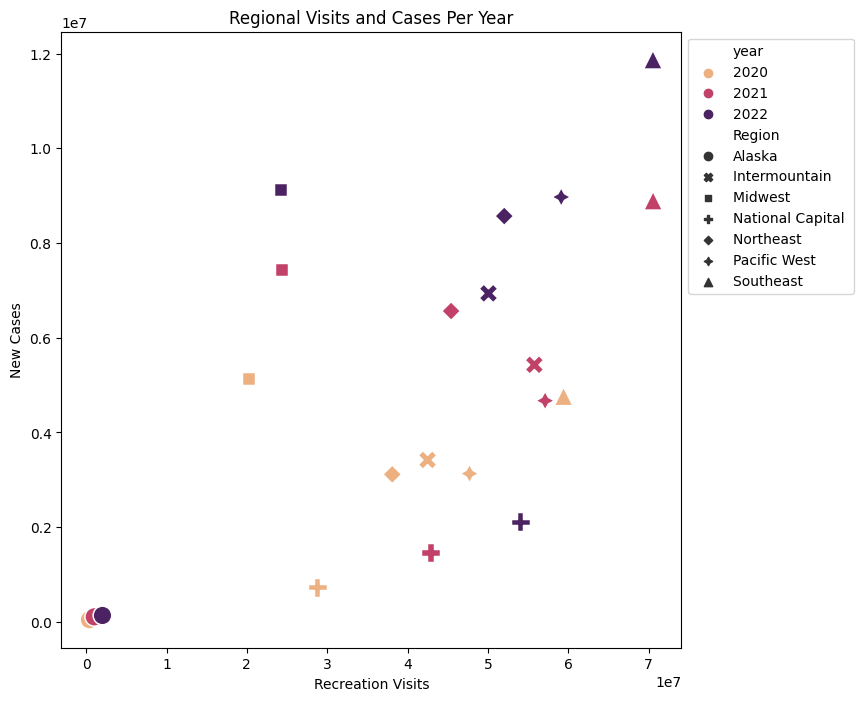

In [313]:
df = visits_and_cases

sns.scatterplot(data=df, x='RecreationVisits', y='new_cases', s=180,
                hue = 'year', style = 'Region', palette="flare")
plt.legend(bbox_to_anchor =(1,1))

plt.title("Regional Visits and Cases Per Year")
plt.xlabel("Recreation Visits")
plt.ylabel("New Cases")